In [1]:
import tensorflow as tf
import numpy as np
import itertools
from collections import Counter

# Basic Concepts

Embeddings:
cat: [0.2 0.1 0.7]
dog: [0.3 0.2 0.8]
apple: [0.9 0.1 0.2]
banana: [0.8 0.2 0.1]
king: [0.6 0.9 0.2]
queen: [0.7 0.8 0.3]
man: [0.5 0.9 0.1]
woman: [0.6 0.8 0.2]


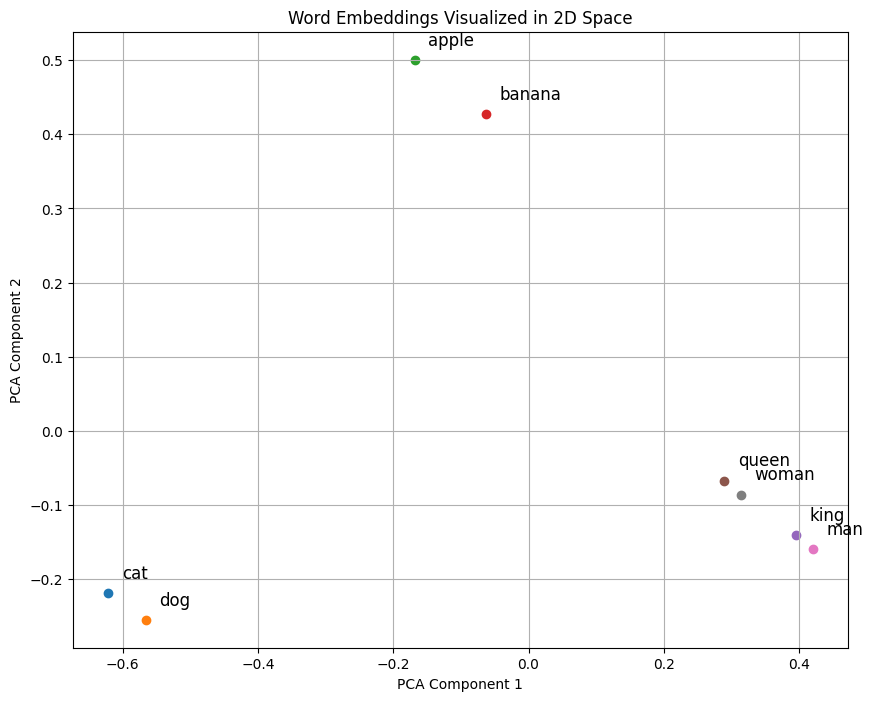

king - man + woman ≈ queen


In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the vocabulary
vocabulary = ["cat", "dog", "apple", "banana", "king", "queen", "man", "woman"]

# Assign mock 3D embeddings
embeddings = {
    "cat": np.array([0.2, 0.1, 0.7]),
    "dog": np.array([0.3, 0.2, 0.8]),
    "apple": np.array([0.9, 0.1, 0.2]),
    "banana": np.array([0.8, 0.2, 0.1]),
    "king": np.array([0.6, 0.9, 0.2]),
    "queen": np.array([0.7, 0.8, 0.3]),
    "man": np.array([0.5, 0.9, 0.1]),
    "woman": np.array([0.6, 0.8, 0.2]),
}

# Print the embeddings
print("Embeddings:")
for word, embedding in embeddings.items():
    print(f"{word}: {embedding}")

# Extract words and their embeddings
words = list(embeddings.keys())
vectors = np.array(list(embeddings.values()))

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

plt.title("Word Embeddings Visualized in 2D Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()

# Perform the analogy king - man + woman
analogy_vector = embeddings["king"] - embeddings["man"] + embeddings["woman"]

# Find the closest word (excluding "king", "man", and "woman")
def find_closest_word(vector, exclude=[]):
    min_distance = float('inf')
    closest_word = None
    for word, embedding in embeddings.items():
        if word not in exclude:
            distance = np.linalg.norm(vector - embedding)
            if distance < min_distance:
                min_distance = distance
                closest_word = word
    return closest_word

# Find the word closest to the analogy vector
closest_word = find_closest_word(analogy_vector, exclude=["king", "man", "woman"])
print(f"king - man + woman ≈ {closest_word}")


king: [0.82 0.65 0.42]
man: [0.42 0.64 0.38]
woman: [0.45 0.63 0.62]
queen: [0.81 0.67 0.65]
king - man + woman: [0.85 0.64 0.66]


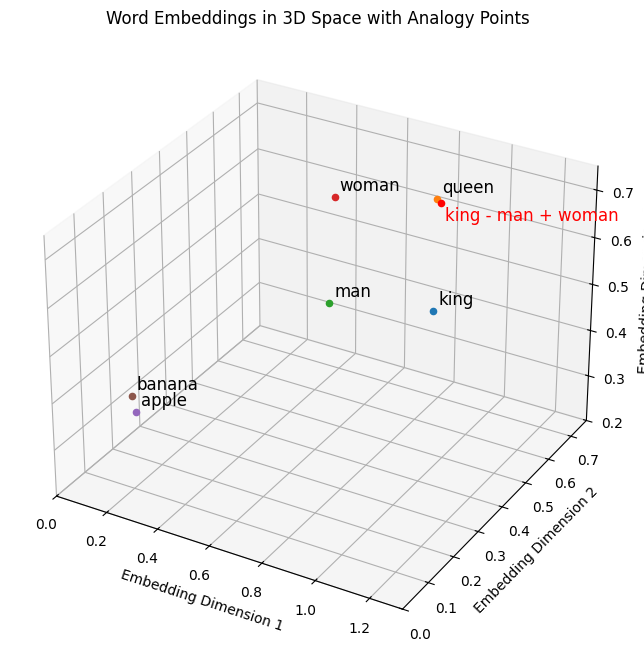

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the vocabulary
vocabulary = ["king", "queen", "man", "woman", "apple", "banana"]

# Assign mock 3D embeddings ensuring clear relationships
embeddings = {
    "king": np.array([0.82, 0.65, 0.42]),
    "queen": np.array([0.81, 0.67, 0.65]),
    "man": np.array([0.42, 0.64, 0.38]),
    "woman": np.array([0.45, 0.63, 0.62]),
    "apple": np.array([0.1, 0.2, 0.3]),
    "banana": np.array([0.2, 0.1, 0.4]),
}

# Extract words and their embeddings
words = list(embeddings.keys())
vectors = np.array(list(embeddings.values()))

# Compute the analogy vector
analogy_vector = embeddings["king"] - embeddings["man"] + embeddings["woman"]

# Print debug information
print("king:", embeddings["king"])
print("man:", embeddings["man"])
print("woman:", embeddings["woman"])
print("queen:", embeddings["queen"])
print("king - man + woman:", analogy_vector)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the words in 3D space
for i, word in enumerate(words):
    ax.scatter(vectors[i, 0], vectors[i, 1], vectors[i, 2], label=word)
    ax.text(vectors[i, 0] + 0.01, vectors[i, 1] + 0.01, vectors[i, 2] + 0.01, word, fontsize=12)

# Plot the analogy vector
ax.scatter(analogy_vector[0], analogy_vector[1], analogy_vector[2], color='red', label='king - man + woman')
ax.text(analogy_vector[0] + 0.01, analogy_vector[1] + 0.01, analogy_vector[2] - 0.04, 'king - man + woman', fontsize=12, color='red')

# Set the axis limits to ensure words are within the boundary with good margin
ax.set_xlim(vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.5)
ax.set_ylim(vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1)
ax.set_zlim(vectors[:, 2].min() - 0.1, vectors[:, 2].max() + 0.1)

ax.set_title("Word Embeddings in 3D Space with Analogy Points")
ax.set_xlabel("Embedding Dimension 1")
ax.set_ylabel("Embedding Dimension 2")
ax.set_zlabel("Embedding Dimension 3")
#ax.legend()
plt.show()


In [4]:
# Sample sentences
sentences = [
    'I love machine learning',
    'Deep learning is a subset of machine learning',
    'Natural language processing is a part of artificial intelligence',
    'Word embeddings are useful for NLP tasks',
    'TensorFlow is a powerful library for machine learning'
]

In [5]:
# Tokenize the sentences
tokenized_sentences = [sentence.lower().split() for sentence in sentences] 

# flatten the sentences 
# chain basically join all the lists together, * unpacks the list into mulitple arguments to the chain function
vocabulary = list(itertools.chain(*tokenized_sentences))
print(vocabulary[:100])

# count the number of times each word appears
word_counts = Counter(vocabulary)
print(word_counts)

vocabulary_size = len(word_counts)
print(vocabulary_size)

word_to_index = {word: i for i, (word, _) in enumerate(word_counts.most_common())}
index_to_word = {i: word for word, i in word_to_index.items()}

print(word_to_index, index_to_word)
print(word_counts.most_common())

['i', 'love', 'machine', 'learning', 'deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning', 'natural', 'language', 'processing', 'is', 'a', 'part', 'of', 'artificial', 'intelligence', 'word', 'embeddings', 'are', 'useful', 'for', 'nlp', 'tasks', 'tensorflow', 'is', 'a', 'powerful', 'library', 'for', 'machine', 'learning']
Counter({'learning': 4, 'machine': 3, 'is': 3, 'a': 3, 'of': 2, 'for': 2, 'i': 1, 'love': 1, 'deep': 1, 'subset': 1, 'natural': 1, 'language': 1, 'processing': 1, 'part': 1, 'artificial': 1, 'intelligence': 1, 'word': 1, 'embeddings': 1, 'are': 1, 'useful': 1, 'nlp': 1, 'tasks': 1, 'tensorflow': 1, 'powerful': 1, 'library': 1})
25
{'learning': 0, 'machine': 1, 'is': 2, 'a': 3, 'of': 4, 'for': 5, 'i': 6, 'love': 7, 'deep': 8, 'subset': 9, 'natural': 10, 'language': 11, 'processing': 12, 'part': 13, 'artificial': 14, 'intelligence': 15, 'word': 16, 'embeddings': 17, 'are': 18, 'useful': 19, 'nlp': 20, 'tasks': 21, 'tensorflow': 22, 'powerful': 23, 'librar

# Skip-gram Model: 

This model uses pairs of (target word, context word) for training.

In [6]:
# Generate Skip-gram data
# Generates pairs of context, target indices. 
def generate_skipgram_data(tokenized_sentences, word_to_index, window_size=2):
    data = []
    for sentence in tokenized_sentences:
        sentence_indices = [word_to_index[word] for word in sentence] # convert each token into word indices
        
        # based on the window around target indice, generate context index and target index pairs
        for i, target in enumerate(sentence_indices):
            # max and min is used to ensure window selection do not exceed the sentence length, the below will provide list of indicies within the window skip target
            context_indices = sentence_indices[max(0, i - window_size):i] + \
                              sentence_indices[i + 1:min(len(sentence_indices), i + window_size + 1)]
            
            for context in context_indices:
                data.append((target, context))
    return data

training_data = generate_skipgram_data(tokenized_sentences, word_to_index)

for a, b in generate_skipgram_data(tokenized_sentences[:1], word_to_index):
    print(f"conext: {index_to_word[a]}, target: {index_to_word[b]}")

conext: i, target: love
conext: i, target: machine
conext: love, target: i
conext: love, target: machine
conext: love, target: learning
conext: machine, target: i
conext: machine, target: love
conext: machine, target: learning
conext: learning, target: love
conext: learning, target: machine


# Continuous Bag of Words (CBOW) Model: 

This model uses a list of context words to predict the target word.

In [7]:
# Generate continuous bag of works which uses contexts words to pred
def generate_cbow_data(tokenized_sentences, word_to_index, window_size=2):
    data = []
    max_context_length = 2 * window_size
    
    for sentence in tokenized_sentences:
        sentence_indices = [word_to_index[word] for word in sentence]
        for i, target in enumerate(sentence_indices):
            start = max(0, i - window_size)
            end = min(len(sentence_indices), i + window_size + 1)
            context_indices = [sentence_indices[j] for j in range(start, end) if j != i]
            
            # Pad context_indices to max_context_length
            context_indices += [0] * (max_context_length - len(context_indices))
            
            data.append((context_indices, target))
    return data

tokenized_sentences = [
    ['i', 'love', 'machine', 'learning'],
    ['deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning']
]
word_to_index = {'i': 0, 'love': 1, 'machine': 2, 'learning': 3, 'deep': 4, 'is': 5, 'a': 6, 'subset': 7, 'of': 8, 'artificial': 9, 'intelligence': 10, 'natural': 11, 'language': 12, 'processing': 13, 'part': 14, 'artificial': 15, 'intelligence': 16, 'word': 17, 'embeddings': 18, 'are': 19, 'useful': 20, 'for': 21, 'nlp': 22, 'tasks': 23, 'tensorflow': 24, 'powerful': 25, 'library': 26}
window_size = 2

cbow_data = generate_cbow_data(tokenized_sentences, word_to_index, window_size)
print(cbow_data)



[([1, 2, 0, 0], 0), ([0, 2, 3, 0], 1), ([0, 1, 3, 0], 2), ([1, 2, 0, 0], 3), ([3, 5, 0, 0], 4), ([4, 5, 6, 0], 3), ([4, 3, 6, 7], 5), ([3, 5, 7, 8], 6), ([5, 6, 8, 2], 7), ([6, 7, 2, 3], 8), ([7, 8, 3, 0], 2), ([8, 2, 0, 0], 3)]


In [10]:
# Prepare the input data
contexts, targets = zip(*cbow_data)
contexts = np.array(contexts)
targets = np.array(targets)

In [11]:
import tensorflow as tf

# Define the CBOW model with only Dense layers
embedding_dim = 50
max_context_length = 2 * window_size

class CBOWModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOWModel, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        
        # Define the embedding matrix
        # This is the embedding matrix. It is typically a 2D tensor of shape [vocab_size, embedding_dim], where:
        #   - vocab_size is the number of unique words in the vocabulary.
        #   - embedding_dim is the dimensionality of the embedding vectors.
        self.W = tf.Variable(tf.random.normal([vocab_size, embedding_dim]))
        
        # Define the dense layer
        self.dense = tf.keras.layers.Dense(vocab_size, activation='softmax')

    def call(self, inputs): #inputs are the word indices

        # Look up the embeddings for the input context words (so if the inputs are [0, 2], it will just look up self.W for the values)
        x = tf.nn.embedding_lookup(self.W, inputs)
        
        # Average the context word embeddings
        x = tf.reduce_mean(x, axis=1)
        
        # Apply the dense layer to predict the target word
        x = self.dense(x)
        return x

model = CBOWModel(vocabulary_size, embedding_dim)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(contexts, targets, epochs=10, batch_size=64)

# Extract the word embeddings
embeddings = model.W.numpy()

# Example: Get the vector for the word 'machine'
vector = embeddings[word_to_index['machine']]
print(vector)


Epoch 1/10


2024-07-26 11:46:03.382356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 3.4775
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 3.4474
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 3.4176
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 3.3880
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 3.3586
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 3.3293
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 3.3003
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 3.2715
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 3.2429
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 3.2146
[-0.13414331 -0.35642418  1.13566    -0.40600944  0.42381138  1.0140337
 -0.7380519  -0.60085994 -1.2160635   0.8206668   1.1051877   1.3773644
 -0.53539944  1.940193   -0.32515475 -0.8661586  -2.721744   -0.14717841
  1.359446   -0.42705995

## Example of Embedding Look up

In [35]:
import tensorflow as tf

# Example embedding matrix
W = tf.Variable(tf.random.normal([5, 3]))  # vocab_size=5, embedding_dim=3

# Example input tensor of word indices
inputs = tf.constant([0, 2, 3, 1])

# Perform embedding lookup
x = tf.nn.embedding_lookup(W, inputs)
print("Embedding matrix (self.W):\n", W.numpy())
print("Input word indices (inputs):\n", inputs.numpy())
print("Looked-up embeddings (x):\n", x.numpy())


Embedding matrix (self.W):
 [[-1.3544159   0.7045493   0.03666191]
 [ 0.86918795  0.43842277 -0.53439844]
 [-0.07710292  1.5658046  -0.1012345 ]
 [-0.2744975   1.420466    1.2609465 ]
 [-0.4364091  -1.963399   -0.06452482]]
Input word indices (inputs):
 [0 2 3 1]
Looked-up embeddings (x):
 [[-1.3544159   0.7045493   0.03666191]
 [-0.07710292  1.5658046  -0.1012345 ]
 [-0.2744975   1.420466    1.2609465 ]
 [ 0.86918795  0.43842277 -0.53439844]]


In [25]:
# Prepare the input data
targets, contexts = zip(*training_data)
targets = np.array(targets)
contexts = np.array(contexts)

In [26]:
# Define the model without using Embedding layer
embedding_dim = 50

class SkipGramModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W = tf.Variable(tf.random.normal([vocab_size, embedding_dim]))
        self.b = tf.Variable(tf.random.normal([embedding_dim]))
        self.V = tf.Variable(tf.random.normal([embedding_dim, vocab_size]))
        self.c = tf.Variable(tf.random.normal([vocab_size]))

    def call(self, inputs):
        x = tf.nn.embedding_lookup(self.W, inputs)
        x = tf.reduce_mean(x, axis=1)
        x = tf.matmul(x, self.V) + self.c
        x = tf.nn.softmax(x)
        return x

model = SkipGramModel(vocabulary_size, embedding_dim)

2024-07-02 16:22:25.163586: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-02 16:22:25.163618: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-02 16:22:25.163625: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-02 16:22:25.163680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-02 16:22:25.163976: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
# Define loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [36]:
# Train the model
EPOCHS = 10

for epoch in range(EPOCHS):
    epoch_loss_avg = tf.keras.metrics.Mean()

    for target, context in zip(targets, contexts):
        target = np.array([target])
        context = np.array([context])
        loss_value, grads = grad(model, target, context)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss_avg.update_state(loss_value)

    print(f"Epoch {epoch+1}: Loss: {epoch_loss_avg.result().numpy()}")

ValueError: Exception encountered when calling layer 'cbow_model' (type CBOWModel).

Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (1,)

Call arguments received by layer 'cbow_model' (type CBOWModel):
  • inputs=tf.Tensor(shape=(1,), dtype=int64)

In [ ]:
# Extract the word embeddings
embeddings = model.W.numpy()

# Example: Get the vector for the word 'machine'
vector = embeddings[word_to_index['machine']]
print(vector)